# FEATURE SELECTION - SEQUENTIAL BACKWARD SELECTION

## OVERVIEW

- [INTRODUCTION](#INTRODUCTION)  
- [FEATURE SELECTION](#FEATURE-SELECTION)
    - [SEQUENTIAL BACKWARD SELECTION](#SEQUENTIAL-BACKWARD-SELECTION)

## INTRODUCTION

A way to reduce overfitting (complexity of the model) is **Dimensionality Reduction** via **feature selection**. There are two main categories:
- **Feature Selection**
- **Feature Extraction**

In case of **feature selection** a subset of the original features is used in order to build our model. On the other hand, in **feature extraction** the objective is to create a new reduced feature set using the information from the original feature set. As stated before, both tecniques are useful to deal with the *[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)*.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>Curse of Dimensionality</strong>
<br/>
As additional variables are added to a model, it may be able to predict a number better in regresssion models or discriminate better between classes in a classification model. The problem is that convergence on those solutions during either the error minimization process or the iterative learning process gets increasingly slow as additional features are added to the analysis.
</div>


## FEATURE SELECTION

The motivation behind feaure selection is to **select the best subset of features that are more relevant to the problem**. By doing this, we can:

- Reduce overfitting/complexity (reduce the generalization error)
- Improve computational efficiency
- Enhance data quality
- Make the results more understandable

This set of tecniques/algorithms can be useful for algorithms in which regularization is not supported (KNN, SVM, Naive Bayes, etc.)

## UNIVARIATE FEATURE SELECTION

**Univariate feature selection** works by selecting the best features based on univariate statistical tests.

For instance, we can perfom $\chi^2$ test to the samples to retrieve only the best features.

In [16]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                      header=None)
df_wine.columns = ['Class label', 
                   'Alcohol', 
                   'Malic acid', 
                   'Ash', 
                   'Alcalinity of ash', 
                   'Magnesium', 
                   'Total phenols', 
                   'Flavanoids', 
                   'Nonflavanoid phenols', 
                   'Proanthocyanins', 
                   'Color intensity', 
                   'Hue', 
                   'OD280/OD315 of diluted wines', 
                   'Proline']

In [17]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df_wine.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
df_wine.dtypes

Class label                       int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

k_set = [i+1 for i in range(X_train.shape[1]-1)]

pipe = Pipeline([('reduce_dim', SelectKBest(chi2)),
                 ('classify', KNeighborsClassifier(n_neighbors=5))])

parameters = {'reduce_dim__k':k_set}
grid = GridSearchCV(estimator=pipe, 
                    param_grid=parameters, 
                    cv=5, 
                    n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('reduce_dim', SelectKBest(k=10, score_func=<function chi2 at 0x11c81bea0>)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'reduce_dim__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
grid.best_estimator_

Pipeline(steps=[('reduce_dim', SelectKBest(k=2, score_func=<function chi2 at 0x11c81bea0>)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [58]:
grid.best_score_

0.66935483870967738

In [59]:
grid.cv_results_

{'mean_fit_time': array([ 0.02331686,  0.00423059,  0.00748839,  0.00458665,  0.00333595,
         0.00390344,  0.00363383,  0.0034132 ,  0.0032104 ,  0.00346246,
         0.00324221,  0.00455141]),
 'mean_score_time': array([ 0.00628996,  0.00199981,  0.00192728,  0.00189676,  0.00191445,
         0.00287113,  0.00287662,  0.00265913,  0.00219293,  0.00196834,
         0.0030757 ,  0.0024786 ]),
 'mean_test_score': array([ 0.65322581,  0.66935484,  0.66935484,  0.66935484,  0.66935484,
         0.64516129,  0.64516129,  0.62903226,  0.62903226,  0.62903226,
         0.62903226,  0.62903226]),
 'mean_train_score': array([ 0.76612121,  0.79438384,  0.80042424,  0.80038384,  0.80040404,
         0.78828283,  0.79030303,  0.79230303,  0.79230303,  0.79230303,
         0.79230303,  0.79230303]),
 'param_reduce_dim__k': masked_array(data = [1 2 3 4 5 6 7 8 9 10 11 12],
              mask = [False False False False False False False False False False False False],
        fill_value = ?),
 '

In [40]:
X_new[0]

array([   15.6 ,   127.  ,     3.06,     5.64,  1065.  ])

In [47]:
z = [4,5,7,10,13]
df_wine.columns[z]

Index(['Alcalinity of ash', 'Magnesium', 'Flavanoids', 'Color intensity',
       'Proline'],
      dtype='object')

In [45]:
np.argwhere(x=X_new[0])

TypeError: argwhere() got an unexpected keyword argument 'x'

## SEQUENTIAL BACKWARD SELECTION

**Sequential Backward Selection** (SBS) is a selection algorithm which aims to reduce dimensionality with a minimum decay in performance

The idea is:

1. Initialize with $k=d$ (where $k$ is the dimensional space objective and $d$ is the dimensionality of the full feature space)
2. Determine the feature $x_i$ that gives the worst result (cost function)
3. Remove the feature $x_i$
4. Terminate if $k$ is reached, if not, go to step 2

In [1]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# creating the class SBS
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1, debug=False):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        self.debug = debug
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=self.test_size, 
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        if self.debug:
            print('Dimensionality: {0} (objective: {1})'.format(dim, self.k_features))
            print('Subset: {0}'.format(self.subsets_))
            print('Score: {0}'.format(score))
            i = 0
        
        while dim > self.k_features:
            scores = []
            subsets = []

            if self.debug:
                print('----------------------')
                print('Iteration: {0}'.format(i))
                i += 1
                j = 1

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                if self.debug:
                    print('Combination {0}: {1}'.format(j, p))
                    print('Score: {0}'.format(score))
                    j += 1

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            if self.debug:
                print('\nBest Features: {0}'.format(subsets[best]))
                print('Best Score: {0}'.format(scores[best]))

            self.scores_.append(scores[best])
        
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
            
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:,indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [8]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 11

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(estimator=knn, k_features=1, debug=True)
sbs.fit(X_train_scaled, y_train)

Dimensionality: 13 (objective: 1)
Subset: [(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]
Score: 0.9354838709677419
----------------------
Iteration: 0
Combination 1: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
Score: 0.8709677419354839
Combination 2: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)
Score: 0.9032258064516129
Combination 3: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)
Score: 0.9032258064516129
Combination 4: (0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)
Score: 0.9032258064516129
Combination 5: (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
Score: 0.9354838709677419
Combination 6: (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12)
Score: 0.9354838709677419
Combination 7: (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)
Score: 0.9354838709677419
Combination 8: (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)
Score: 0.9354838709677419
Combination 9: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)
Score: 0.967741935483871
Combination 10: (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)
Score: 0.9354838709677419
Combination 11: (0, 1, 3, 4, 5, 6, 7, 8, 9, 

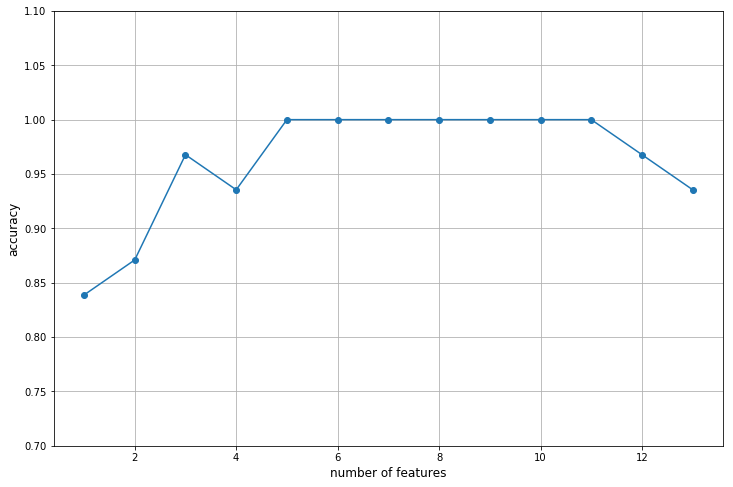

In [11]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('accuracy')
plt.xlabel('number of features')
plt.grid()
plt.show()

In [12]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [13]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 6, 7, 8, 9, 10, 12),
 (0, 1, 2, 3, 6, 7, 8, 10, 12),
 (0, 1, 2, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 8, 10, 12),
 (0, 1, 3, 6, 10, 12),
 (0, 1, 3, 10, 12),
 (0, 1, 10, 12),
 (0, 1, 10),
 (0, 10),
 (0,)]

Let's evaluate the performance of the KNN Classifier on the original test set

In [14]:
knn.fit(X_train_scaled, y_train)
print('Training accuracy: {0}'.format(knn.score(X_train_scaled, y_train)))
print('Test accuracy: {0}'.format(knn.score(X_test_scaled, y_test)))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


In the preceding cell we used the complete feature set and the accuracy in the training and test datasets are slightly different showing a slight degree of **overfitting** (since the accuracy of the training set is higher than the accuracy of the test set) 

Now, let's use the selected 5-feature subset and see how well KNN performs

In [15]:
knn.fit(X_train_scaled[:, k5], y_train)
print('Training accuracy: {0}'.format(knn.score(X_train_scaled[:, k5], y_train)))
print('Test accuracy: {0}'.format(knn.score(X_test_scaled[:, k5], y_test)))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


Using fewer than half of the original features, the prediction accuracy on the test set improved by almost 2 percent. Also, we reduced overfitting which we can tell from the small gap between test and training accuracy.